# EXPLORATORY DATA ANALYSIS

<div style="background-color: black|; padding: 10px; border-radius: 5px;">
    

Exploratory Data Analysis (EDA) is a critical first step before starting clustering to understand the structure, relationships, and characteristics of the dataset. Here’s how to perform EDA for clustering:

1. Data Overview: Start by examining the dataset for size, data types, and missing values. Check the number of features and samples to understand the dataset's complexity.

2. Missing Data Handling: Identify and handle missing values through imputation or removal to ensure clustering algorithms can process the data accurately.

3. Visualizations: Use pair plots, heatmaps, and scatter plots to explore relationships and clusters within the data visually.
    
    </div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score

In [2]:
pip install kneed

## Import Data


In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/student_dropout_behavior_dataset.csv")
df.head()

,student_id,name,age,gender,quiz1_marks,quiz2_marks,quiz3_marks,total_assignments,assignments_submitted,midterm_marks,final_marks,previous_gpa,total_lectures,lectures_attended,total_lab_sessions,labs_attended
0,1,Kristina Vaughan,19,Male,8.0,5.7,7.4,5,NaN,30.0,36.5,2.57,12,4,6,1
1,2,Rodney Daniels,21,Male,10.0,7.9,4.1,5,NaN,25.4,33.0,2.40,12,1,6,5
2,3,Jose Nash,19,Female,7.5,1.2,0.3,5,NaN,14.4,24.8,2.99,12,0,6,0
3,4,Nicole Martin,21,Male,5.2,2.5,9.9,5,NaN,17.7,41.0,1.68,12,9,6,0
4,5,Shelby Smith,21,Female,5.9,6.3,2.0,5,NaN,23.8,31.0,2.53,12,7,6,4


## Check for missing values

In [4]:
print(df.isnull().sum())

student_id                 0
name                       0
age                        0
gender                     0
quiz1_marks                0
quiz2_marks                0
quiz3_marks                0
total_assignments          0
assignments_submitted    300
midterm_marks              0
final_marks                0
previous_gpa               0
total_lectures             0
lectures_attended          0
total_lab_sessions         0
labs_attended              0
dtype: int64


## Check Unique Value

In [7]:
print("--- Unique values for all columns ---")
for col in df.columns:
    if df[col].nunique() < 50: # Arbitrary threshold for displaying all unique values
        print(f"Unique values for {col}: {df[col].unique()}")
    else:
        print(f"Column '{col}' has {df[col].nunique()} unique values.")

--- Unique values for all columns ---
Column 'student_id' has 300 unique values.
Column 'name' has 297 unique values.
Unique values for age: [19 21 22 23 18 24 25 20]
Unique values for gender: ['Male' 'Female']
Column 'quiz1_marks' has 63 unique values.
Column 'quiz2_marks' has 89 unique values.
Column 'quiz3_marks' has 90 unique values.
Unique values for total_assignments: [5]
Unique values for assignments_submitted: [nan]
Column 'midterm_marks' has 156 unique values.
Column 'final_marks' has 173 unique values.
Column 'previous_gpa' has 171 unique values.
Unique values for total_lectures: [12]
Unique values for lectures_attended: [ 4  1  0  9  7 11  3  6  5 10  2  8 12]
Unique values for total_lab_sessions: [6]
Unique values for labs_attended: [1 5 0 4 3 6 2]


## Drop Column

In [9]:
columns_to_drop = ['assignments_submitted']
df_cleaned = df.drop(columns=columns_to_drop)
df_cleaned.head()

,student_id,name,age,gender,quiz1_marks,quiz2_marks,quiz3_marks,total_assignments,midterm_marks,final_marks,previous_gpa,total_lectures,lectures_attended,total_lab_sessions,labs_attended
0,1,Kristina Vaughan,19,Male,8.0,5.7,7.4,5,30.0,36.5,2.57,12,4,6,1
1,2,Rodney Daniels,21,Male,10.0,7.9,4.1,5,25.4,33.0,2.40,12,1,6,5
2,3,Jose Nash,19,Female,7.5,1.2,0.3,5,14.4,24.8,2.99,12,0,6,0
3,4,Nicole Martin,21,Male,5.2,2.5,9.9,5,17.7,41.0,1.68,12,9,6,0
4,5,Shelby Smith,21,Female,5.9,6.3,2.0,5,23.8,31.0,2.53,12,7,6,4


<span style="color: blue; font-style: italic;">No missing value in this data, good to proceed with descriptive analytics!</span>



## Check Data Information



In [10]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   student_id          300 non-null    int64  
 1   name                300 non-null    object 
 2   age                 300 non-null    int64  
 3   gender              300 non-null    object 
 4   quiz1_marks         300 non-null    float64
 5   quiz2_marks         300 non-null    float64
 6   quiz3_marks         300 non-null    float64
 7   total_assignments   300 non-null    int64  
 8   midterm_marks       300 non-null    float64
 9   final_marks         300 non-null    float64
 10  previous_gpa        300 non-null    float64
 11  total_lectures      300 non-null    int64  
 12  lectures_attended   300 non-null    int64  
 13  total_lab_sessions  300 non-null    int64  
 14  labs_attended       300 non-null    int64  
dtypes: float64(6), int64(7), object(2)
memory usage: 35.3+ KB

## Descriptive Statistics

In [11]:
df.describe()

,student_id,age,quiz1_marks,quiz2_marks,quiz3_marks,total_assignments,assignments_submitted,midterm_marks,final_marks,previous_gpa,total_lectures,lectures_attended,total_lab_sessions,labs_attended
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.0,0.0,300.000000,300.000000,300.000000,300.0,300.000000,300.0,300.000000
mean,150.500000,21.550000,7.254667,5.866667,5.469000,5.0,NaN,19.969000,37.375000,2.806033,12.0,6.013333,6.0,3.110000
std,86.746758,2.241483,1.611791,2.414786,2.711083,0.0,NaN,8.272229,11.796774,0.732694,0.0,3.726407,0.0,1.982676
min,1.000000,18.000000,2.800000,0.000000,0.000000,5.0,NaN,0.000000,0.000000,0.610000,12.0,0.000000,6.0,0.000000
25%,75.750000,20.000000,6.075000,4.000000,3.600000,5.0,NaN,14.225000,29.875000,2.327500,12.0,3.000000,6.0,1.000000
50%,150.500000,22.000000,7.300000,5.800000,5.600000,5.0,NaN,21.350000,39.600000,2.800000,12.0,6.000000,6.0,3.000000
75%,225.250000,23.000000,8.400000,7.700000,7.200000,5.0,NaN,27.425000,49.550000,3.320000,12.0,9.000000,6.0,5.000000
max,300.000000,25.000000,10.000000,10.000000,10.000000,5.0,NaN,30.000000,50.000000,4.000000,12.0,12.000000,6.0,6.000000



## Visualizations

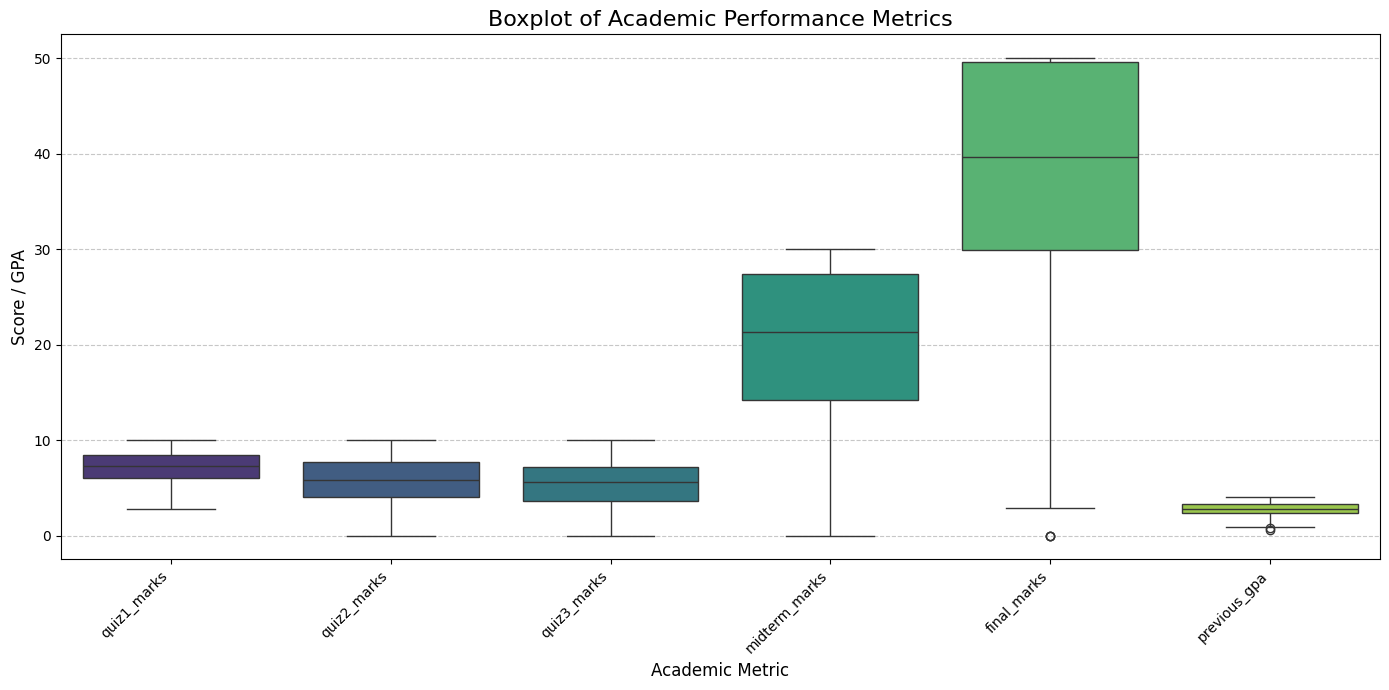

In [13]:
academic_cols = ['quiz1_marks', 'quiz2_marks', 'quiz3_marks', 'midterm_marks', 'final_marks', 'previous_gpa']

df_academic_performance = df_cleaned[academic_cols]

# Melt the DataFrame to a long format for easier plotting
df_melted = df_academic_performance.melt(var_name='Metric', value_name='Score')

plt.figure(figsize=(14, 7))
sns.boxplot(x='Metric', y='Score', data=df_melted, hue='Metric', palette='viridis', legend=False)
plt.title('Boxplot of Academic Performance Metrics', fontsize=16)
plt.xlabel('Academic Metric', fontsize=12)
plt.ylabel('Score / GPA', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# INTEPRETATION

The boxplot provides a clear overview of the academic performance across various metrics. It highlights the central tendency (median), spread (interquartile range), and potential outliers for quiz scores, midterm and final marks, and previous GPA. We can observe the typical range of scores for each academic component and identify any subjects where performance might be consistently higher or lower. The presence of outliers indicates individual students who scored exceptionally well or poorly, warranting further investigation. By comparing the boxes, we can also infer the overall consistency of student performance across different assessments and how previous academic standing (previous_gpa) relates to current course performance.

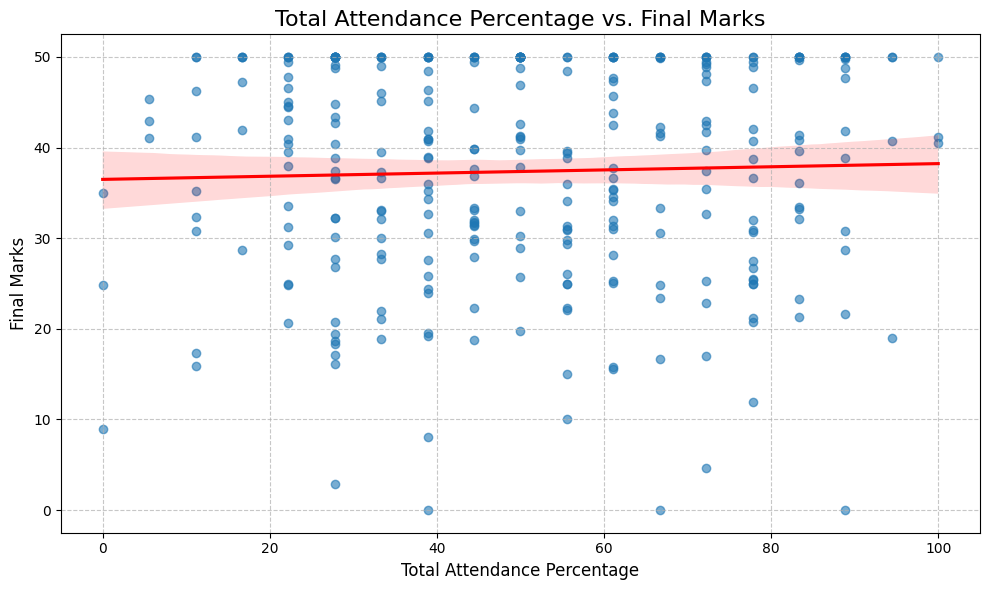

In [18]:
# Calculate 'Total_Attendance_Percentage'
df_cleaned['Total_Possible_Attendance'] = df_cleaned['total_lectures'] + df_cleaned['total_lab_sessions']
df_cleaned['Total_Attended'] = df_cleaned['lectures_attended'] + df_cleaned['labs_attended']
df_cleaned['Total_Attendance_Percentage'] = (df_cleaned['Total_Attended'] / df_cleaned['Total_Possible_Attendance']) * 100

# Create the scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='Total_Attendance_Percentage', y='final_marks', data=df_cleaned, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Total Attendance Percentage vs. Final Marks', fontsize=16)
plt.xlabel('Total Attendance Percentage', fontsize=12)
plt.ylabel('Final Marks', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# INTERPRETATION
The scatter plot above illustrates the relationship between students' total attendance percentage and their final marks. Each point represents a student, with their attendance on the x-axis and their final marks on the y-axis. The red line is a regression line, which indicates the general trend in the data. If the line slopes upwards, it suggests a positive correlation, implying that higher attendance percentages tend to be associated with higher final marks. Conversely, a downward slope would suggest a negative correlation, and a flat line would indicate little to no linear relationship. The spread of the points around the line gives an idea of the variability; tightly clustered points indicate a strong relationship, while widely scattered points suggest a weaker one. This visualization is crucial for understanding whether consistent presence in lectures and labs translates into better academic performance in terms of final marks

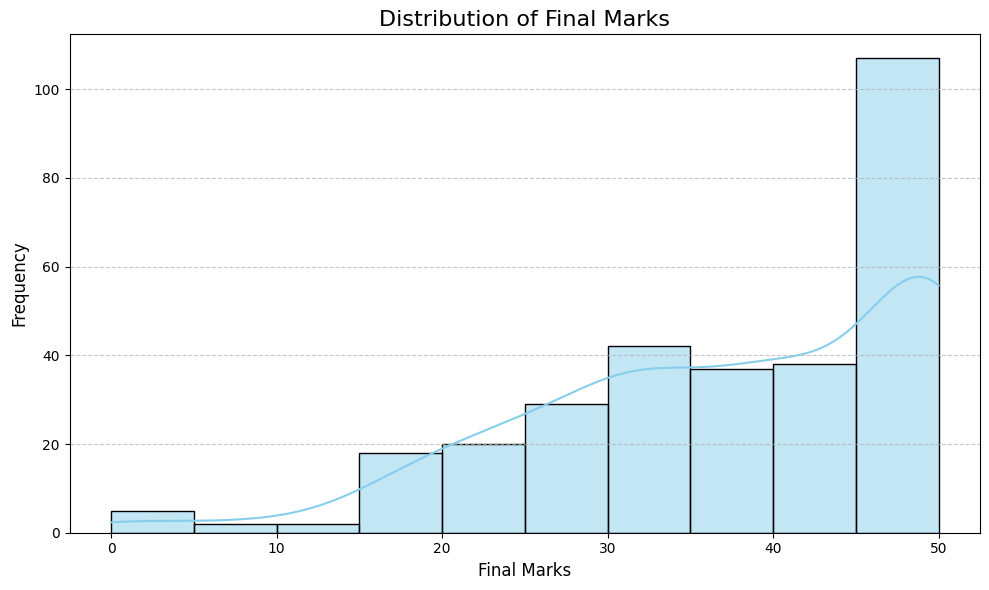

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['final_marks'], bins=10, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Final Marks', fontsize=16)
plt.xlabel('Final Marks', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# INTEPRETATION

Shape of Distribution: You can observe the overall shape of the distribution. Is it symmetric, skewed to the left (more high scores) or right (more low scores), or does it have multiple peaks (bimodal/multimodal)?
Central Tendency: The histogram gives an idea of where most of the final marks are concentrated.
Spread: You can see the range of marks and how spread out they are.
Outliers/Unusual Frequencies: Any bars that are significantly shorter or separated from the main bulk of the data might indicate unusual mark ranges or a smaller number of students achieving those scores.


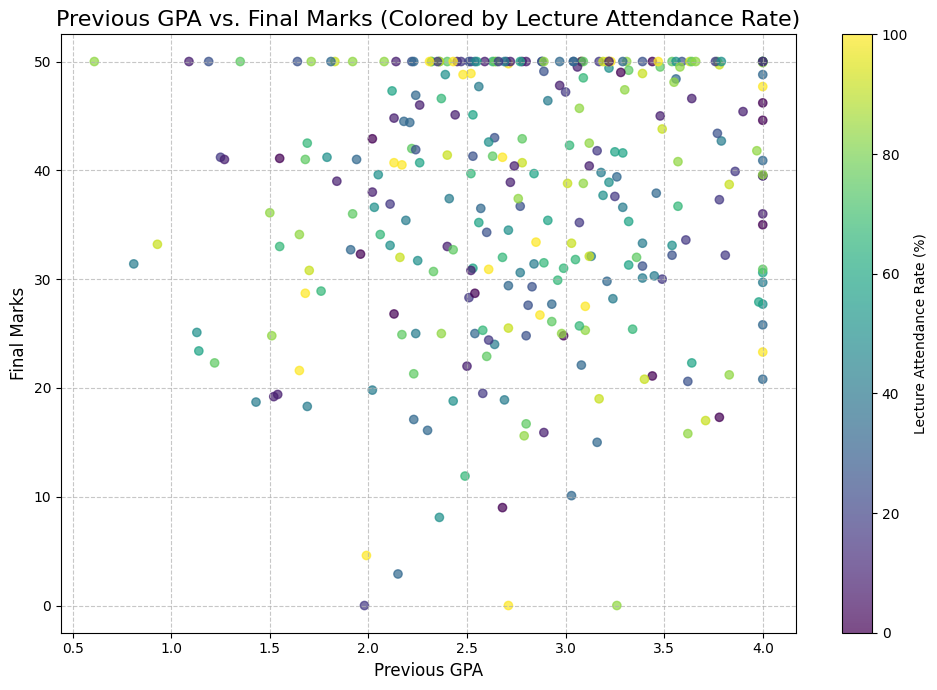

In [20]:
# Calculate 'lecture_attendance_rate'
df_cleaned['lecture_attendance_rate'] = (df_cleaned['lectures_attended'] / df_cleaned['total_lectures']) * 100

plt.figure(figsize=(10, 7))
scatter = plt.scatter(x=df_cleaned['previous_gpa'],
                      y=df_cleaned['final_marks'],
                      c=df_cleaned['lecture_attendance_rate'],
                      cmap='viridis', # Choose a colormap
                      alpha=0.7)

plt.colorbar(scatter, label='Lecture Attendance Rate (%)')
plt.title('Previous GPA vs. Final Marks (Colored by Lecture Attendance Rate)', fontsize=16)
plt.xlabel('Previous GPA', fontsize=12)
plt.ylabel('Final Marks', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#INTEPRETATION

This scatter plot effectively visualizes the intricate relationship among students' prior academic standing (Previous GPA), their current course performance (Final Marks), and their engagement (Lecture Attendance Rate). Each point's position reveals the direct correlation between GPA and final marks, while its color provides an additional dimension, allowing us to observe if students with higher attendance rates tend to achieve better final marks, irrespective of their initial GPA. This integrated view helps identify potential trends, such as whether consistent attendance reinforces strong prior academic performance or helps mitigate a lower starting GPA, offering a comprehensive insight into factors influencing student outcomes.



## ENCODING DATA

In [21]:
columns_to_exclude = ['student_id', 'name', 'gender',
                      'total_assignments', 'total_lectures', 'total_lab_sessions',
                      'Total_Possible_Attendance', 'Total_Attended', 'lecture_attendance_rate']

# Select only the numeric columns from df_cleaned
numeric_cols = df_cleaned.select_dtypes(include=np.number).columns

# Filter out the columns to exclude
features_for_pca = [col for col in numeric_cols if col not in columns_to_exclude]

# Create df_pca_prep with only the selected numeric features
df_pca_prep = df_cleaned[features_for_pca]

# Instantiate StandardScaler
scaler = StandardScaler()

# Fit and transform the data
df_scaled_features = pd.DataFrame(scaler.fit_transform(df_pca_prep), columns=df_pca_prep.columns)

print("Shape of df_pca_prep:", df_pca_prep.shape)
print("Columns in df_pca_prep:", df_pca_prep.columns.tolist())
print("Shape of df_scaled_features:", df_scaled_features.shape)
df_scaled_features.head()

Shape of df_pca_prep: (300, 10)
Columns in df_pca_prep: ['age', 'quiz1_marks', 'quiz2_marks', 'quiz3_marks', 'midterm_marks', 'final_marks', 'previous_gpa', 'lectures_attended', 'labs_attended', 'Total_Attendance_Percentage']
Shape of df_scaled_features: (300, 10)


,age,quiz1_marks,quiz2_marks,quiz3_marks,midterm_marks,final_marks,previous_gpa,lectures_attended,labs_attended,Total_Attendance_Percentage
0,-1.139540,0.463198,-0.069135,0.713452,1.214638,-0.074297,-0.322683,-0.541191,-1.065997,-0.985812
1,-0.245783,1.706127,0.843441,-0.505808,0.657631,-0.371484,-0.555091,-1.347601,0.954850,-0.746731
2,-1.139540,0.152466,-1.935767,-1.909804,-0.674341,-1.067750,0.251502,-1.616404,-1.571208,-2.181219
3,-0.245783,-1.276902,-1.396518,1.637133,-0.274750,0.307801,-1.539408,0.802826,-1.571208,-0.029487
4,-0.245783,-0.841877,0.179750,-1.281700,0.463890,-0.541305,-0.377367,0.265219,0.449638,0.448676


## PCA Prepareration & Visualization


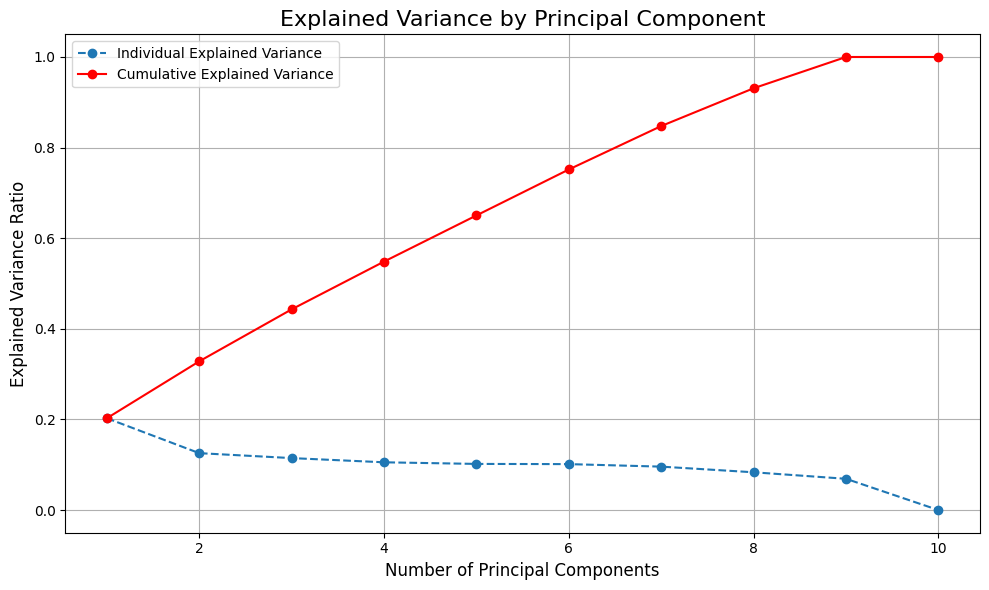

Individual Explained Variance: [0.2026847  0.1256129  0.1147066  0.10543557 0.10186394 0.10142062
 0.09586184 0.08339704 0.06901678 0.        ]
Cumulative Explained Variance: [0.2026847  0.3282976  0.4430042  0.54843977 0.65030371 0.75172433
 0.84758617 0.93098322 1.         1.        ]


In [22]:
pca = PCA(n_components=None) # Keep all components for initial analysis
pca.fit(df_scaled_features)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plotting explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--', label='Individual Explained Variance')
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='-', color='red', label='Cumulative Explained Variance')
plt.title('Explained Variance by Principal Component', fontsize=16)
plt.xlabel('Number of Principal Components', fontsize=12)
plt.ylabel('Explained Variance Ratio', fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Display explained variance for each component
print("Individual Explained Variance:", explained_variance_ratio)
print("Cumulative Explained Variance:", cumulative_explained_variance)

In [23]:
n_components = 8 # Choosing 8 components as they explain over 90% of the variance
pca = PCA(n_components=n_components)
df_pca_components = pca.fit_transform(df_scaled_features)

# Create a DataFrame for the principal components
df_pca = pd.DataFrame(data=df_pca_components, columns=[f'PC{i+1}' for i in range(n_components)])

print(f"Data transformed into {n_components} principal components. Shape: {df_pca.shape}")
df_pca.head()

Data transformed into 8 principal components. Shape: (300, 8)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-1.326250,-0.581329,-0.126757,-0.132904,0.600555,0.205558,1.188363,1.417986
1,-1.344659,0.503614,0.244433,-0.481114,-1.940617,0.847058,0.523306,0.528514
2,-3.128562,-2.194432,0.169758,-1.973714,0.361406,-0.092643,-0.910749,-0.413421
3,0.400017,-0.830295,-1.206819,0.842329,2.137231,0.623495,-0.323390,1.208432
4,0.719964,-0.798692,-0.687513,-0.641633,-0.672117,0.010698,0.519664,-0.897836


In [30]:
print("\nExplained variance per PC (percent) & cumulative:")
for i, (e, c) in enumerate(zip(explained_variance_ratio * 100, cumulative_explained_variance * 100), start=1):
    print(f"PC{i:02d}: {e:.2f}%  |  Cumulative: {c:.2f}%")


Explained variance per PC (percent) & cumulative:
PC01: 20.27%  |  Cumulative: 20.27%
PC02: 12.56%  |  Cumulative: 32.83%
PC03: 11.47%  |  Cumulative: 44.30%
PC04: 10.54%  |  Cumulative: 54.84%
PC05: 10.19%  |  Cumulative: 65.03%
PC06: 10.14%  |  Cumulative: 75.17%
PC07: 9.59%  |  Cumulative: 84.76%
PC08: 8.34%  |  Cumulative: 93.10%
PC09: 6.90%  |  Cumulative: 100.00%
PC10: 0.00%  |  Cumulative: 100.00%


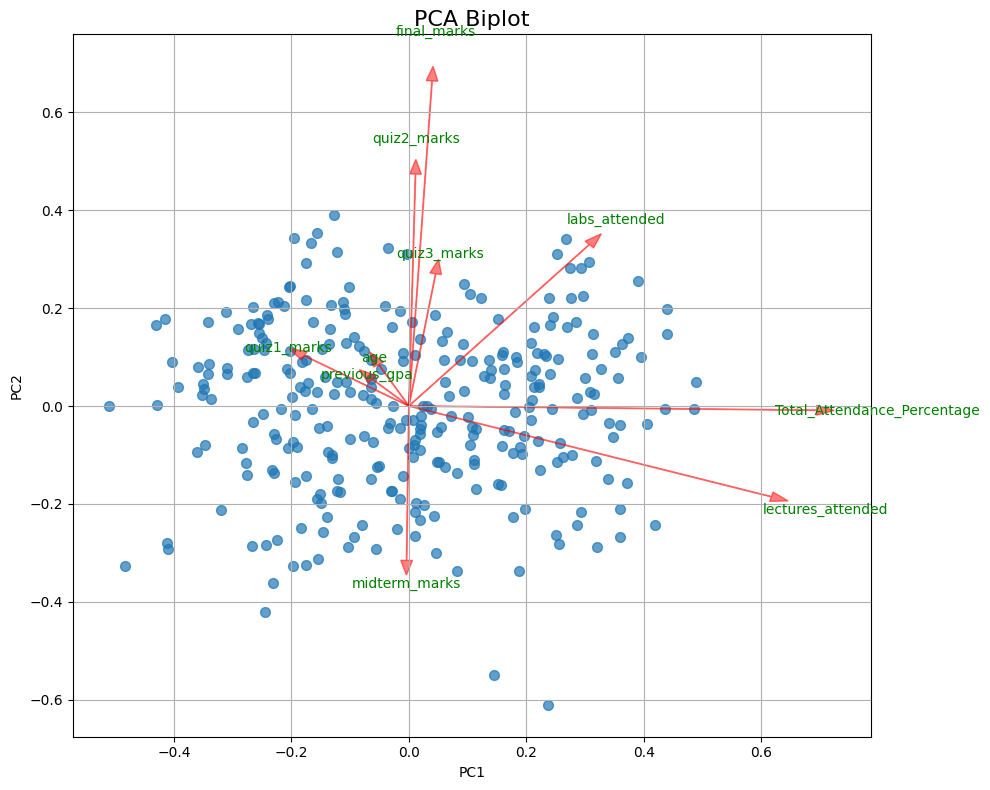

In [25]:
def biplot(score, coeff, labels=None):
    xs = score[:,0] # first principal component
    ys = score[:,1] # second principal component
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())

    plt.figure(figsize=(10, 8))
    plt.scatter(xs * scalex, ys * scaley, s=50, alpha=0.7)

    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5, head_width=0.02)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, df_scaled_features.columns[i], color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')

    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()
    plt.title('PCA Biplot', fontsize=16)
    plt.tight_layout()
    plt.show()

# Call the biplot function
biplot(df_pca_components[:,0:2], np.transpose(pca.components_[0:2, :]), labels=df_scaled_features.columns)


## KMeans Clustering


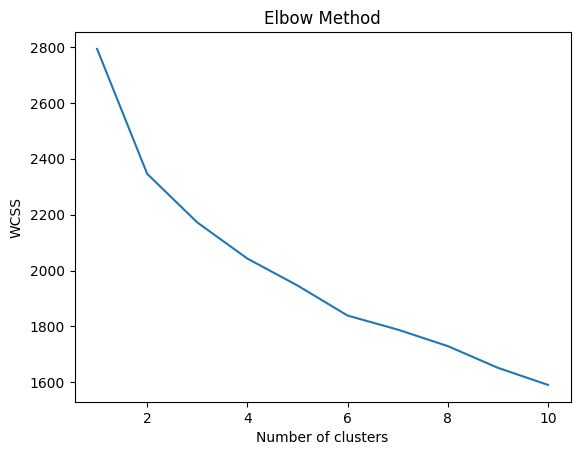

In [35]:
wcss = []
for i in range(1, 11):   #clusters 1-10
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## INTERPRETATION

The Elbow method plot shows the Within-Cluster Sum of Squares (WCSS) against the number of clusters (K). The 'elbow' point in the graph, where the rate of decrease in WCSS significantly slows down, is typically chosen as the optimal number of clusters. Observing the plot, there appears to be a clear bend or 'elbow' at K = 3 or K = 4. Both values represent a point where adding more clusters provides diminishing returns in terms of reducing the sum of squared distances within clusters. For this analysis, K=3 seems like a reasonable choice as the WCSS decreases less sharply after this point, suggesting that additional clusters beyond three do not significantly improve the clustering quality.

In [27]:
n_clusters = 3 # Based on the Elbow method interpretation

kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(df_pca)

# Add cluster labels to df_cleaned for profiling later
df_cleaned['cluster'] = cluster_labels

# Calculate Silhouette Score
silhouette_avg = silhouette_score(df_pca, cluster_labels)

print(f"KMeans clustering performed with {n_clusters} clusters.")
print(f"Silhouette Score: {silhouette_avg:.4f}")
df_cleaned.head()

KMeans clustering performed with 3 clusters.
Silhouette Score: 0.1240


,student_id,name,age,gender,quiz1_marks,quiz2_marks,quiz3_marks,total_assignments,midterm_marks,final_marks,previous_gpa,total_lectures,lectures_attended,total_lab_sessions,labs_attended,Total_Possible_Attendance,Total_Attended,Total_Attendance_Percentage,lecture_attendance_rate,cluster
0,1,Kristina Vaughan,19,Male,8.0,5.7,7.4,5,30.0,36.5,2.57,12,4,6,1,18,5,27.777778,33.333333,2
1,2,Rodney Daniels,21,Male,10.0,7.9,4.1,5,25.4,33.0,2.40,12,1,6,5,18,6,33.333333,8.333333,0
2,3,Jose Nash,19,Female,7.5,1.2,0.3,5,14.4,24.8,2.99,12,0,6,0,18,0,0.000000,0.000000,2
3,4,Nicole Martin,21,Male,5.2,2.5,9.9,5,17.7,41.0,1.68,12,9,6,0,18,9,50.000000,75.000000,2
4,5,Shelby Smith,21,Female,5.9,6.3,2.0,5,23.8,31.0,2.53,12,7,6,4,18,11,61.111111,58.333333,1


In [28]:
cluster_profiles = df_cleaned.groupby('cluster')[features_for_pca].mean()
print("Cluster Profiles (Mean of features per cluster):")
print(cluster_profiles)


Cluster Profiles (Mean of features per cluster):
               age  quiz1_marks  quiz2_marks  quiz3_marks  midterm_marks  \
cluster                                                                    
0        21.875000     7.736458     6.727083     5.703125      18.559375   
1        21.347458     6.947458     6.138983     5.778814      18.640678   
2        21.465116     7.138372     4.532558     4.782558      23.365116   

         final_marks  previous_gpa  lectures_attended  labs_attended  \
cluster                                                                
0          43.608333      2.828542           2.375000       3.166667   
1          38.888983      2.762712           9.415254       3.974576   
2          28.339535      2.840349           5.406977       1.860465   

         Total_Attendance_Percentage  
cluster                               
0                          30.787037  
1                          74.387947  
2                          40.374677  


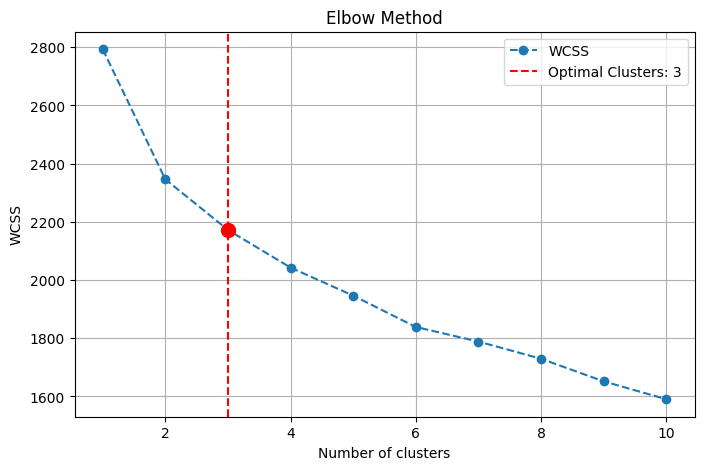

The optimal number of clusters is: 3


In [36]:
from kneed import KneeLocator  # Library to detect the "knee" point

# Example WCSS values and cluster numbers
clusters = range(1, 11)

# Automatically find the elbow point using the KneeLocator
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5)  # Highlight elbow point
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal number of clusters
print(f"The optimal number of clusters is: {optimal_clusters}")


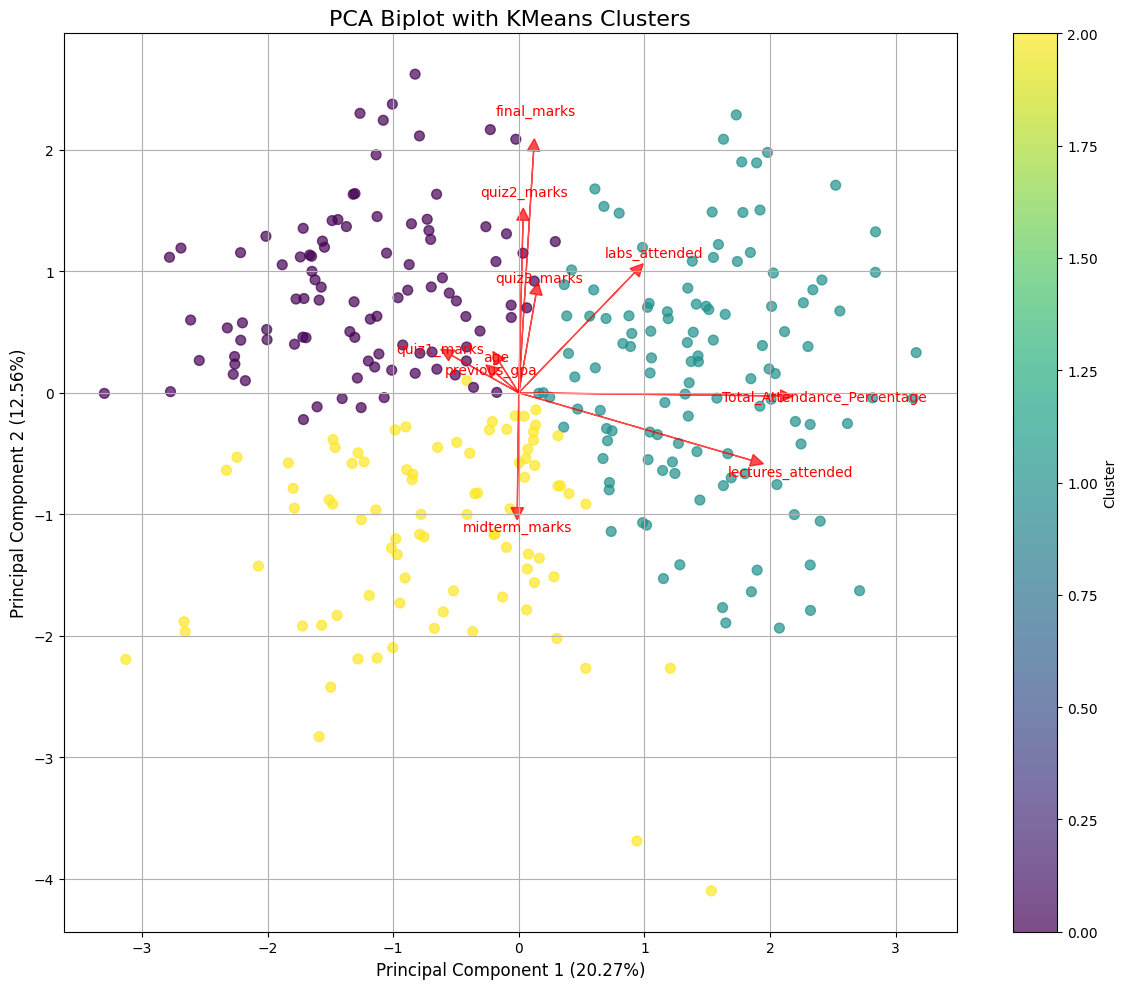

In [29]:
plt.figure(figsize=(12, 10))

# Scatter plot of the data points, colored by cluster
scatter = plt.scatter(df_pca_components[:, 0], df_pca_components[:, 1], c=cluster_labels, cmap='viridis', alpha=0.7, s=50)

# Add the feature vectors (loadings)
for i, (comp0, comp1) in enumerate(np.transpose(pca.components_[:2, :])):
    plt.arrow(0, 0, comp0 * 3, comp1 * 3, color='r', alpha=0.7, head_width=0.1, head_length=0.1)
    plt.text(comp0 * 3.5, comp1 * 3.5, df_scaled_features.columns[i], color='r', ha='center', va='center')

plt.xlabel(f"Principal Component 1 ({explained_variance_ratio[0]*100:.2f}%)", fontsize=12)
plt.ylabel(f"Principal Component 2 ({explained_variance_ratio[1]*100:.2f}%)", fontsize=12)
plt.title('PCA Biplot with KMeans Clusters', fontsize=16)
plt.grid(True)
plt.colorbar(scatter, label='Cluster')
plt.tight_layout()
plt.show()

In [40]:
# Fit K-Means to the data with optimal cluster
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++',random_state=42)
kmeans_cluster = kmeans.fit_predict(df_pca) # KMeans is correctly fitted on the PCA-transformed data (df_pca)

# Add the cluster labels to the DataFrame
df['KMeans'] = kmeans_cluster # Cluster labels are added to the original 'df' DataFrame

In [41]:
# Evaluation
ss = silhouette_score(df_pca, kmeans_cluster)
print(ss)

0.11691428379829444


In [42]:
df.head()

,student_id,name,age,gender,quiz1_marks,quiz2_marks,quiz3_marks,total_assignments,assignments_submitted,midterm_marks,final_marks,previous_gpa,total_lectures,lectures_attended,total_lab_sessions,labs_attended,KMeans
0,1,Kristina Vaughan,19,Male,8.0,5.7,7.4,5,NaN,30.0,36.5,2.57,12,4,6,1,1
1,2,Rodney Daniels,21,Male,10.0,7.9,4.1,5,NaN,25.4,33.0,2.40,12,1,6,5,2
2,3,Jose Nash,19,Female,7.5,1.2,0.3,5,NaN,14.4,24.8,2.99,12,0,6,0,1
3,4,Nicole Martin,21,Male,5.2,2.5,9.9,5,NaN,17.7,41.0,1.68,12,9,6,0,0
4,5,Shelby Smith,21,Female,5.9,6.3,2.0,5,NaN,23.8,31.0,2.53,12,7,6,4,0


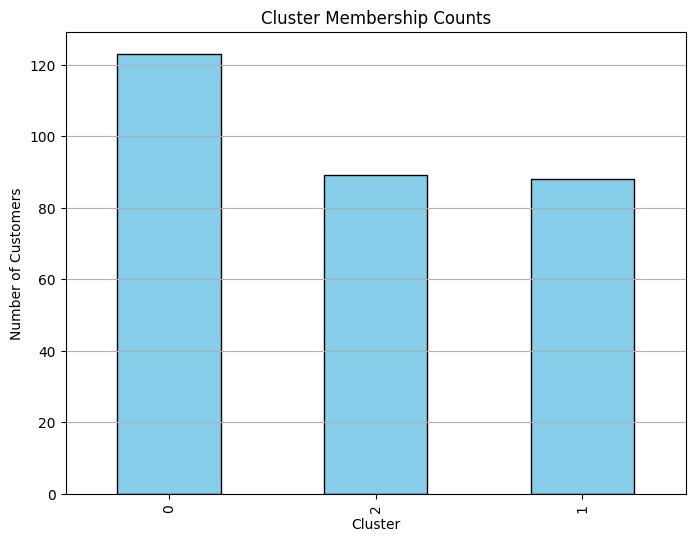

In [43]:
cluster_counts = df['KMeans'].value_counts()

plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cluster Membership Counts')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.grid(axis='y')
plt.show()

## Educational Recommendations and Conclusive Summary

Based on the PCA findings and KMeans clustering, we have identified distinct student segments with varying characteristics. The cluster profiles reveal differences in academic performance and attendance patterns, leading to the following actionable educational recommendations:

### Recommendations:

1.  **Targeted Academic Support for Cluster 2:** Students in Cluster 2 generally exhibit lower quiz and final marks, along with lower lab attendance. This group could benefit significantly from targeted academic support programs. This includes:
    *   **Remedial sessions for specific subjects:** Focus on areas where their quiz marks are particularly low.
    *   **Mandatory lab attendance check-ins:** Implement systems to encourage and track lab participation, possibly with incentives or consequences.
    *   **Early intervention programs:** Proactively identify and support students in this cluster who show early signs of struggling.

2.  **Engagement Strategies for Attendance in Cluster 0:** While Cluster 0 shows strong academic performance in final marks and quizzes, their lecture attendance rates are lower compared to Cluster 1. To further enhance their learning experience and prevent potential disengagement:
    *   **Interactive lecture components:** Introduce more active learning strategies, group discussions, or in-class problem-solving to make lectures more engaging.
    *   **Personalized feedback and check-ins:** For students with lower attendance but good grades, understand if they are missing lectures due to external factors or simply finding them less beneficial, and offer flexible learning options if appropriate.
    *   **Highlight benefits of full attendance:** Emphasize how consistent lecture attendance can further deepen understanding and improve long-term retention.

3.  **Mentorship and Skill Development for Overall Improvement (Cross-Cluster):** The analysis suggests a general positive correlation between attendance and final marks. Therefore, fostering better attendance habits and study skills across all clusters is crucial:
    *   **Peer mentorship programs:** Pair high-performing students with those who need support in attendance or specific subjects.
    *   **Workshops on effective study techniques and time management:** Equip students with skills to balance academic commitments and improve overall learning efficiency.
    *   **Utilize a multi-modal approach to learning:** Offer diverse learning resources (e.g., recorded lectures, supplementary materials) to cater to different learning styles while still encouraging participation in live sessions.

### Conclusive Summary:

This analysis successfully reduced the dimensionality of the student dataset using PCA, identifying key latent factors influencing student performance. KMeans clustering then segmented students into three distinct groups based on these factors. The cluster profiles highlight that academic performance, particularly in quizzes and final marks, and various attendance metrics (lectures and labs) are significant discriminators between these groups. By understanding these profiles, educational institutions can implement tailored interventions and support systems to address the specific needs of each student segment, ultimately aiming to improve academic outcomes and reduce dropout risks.

## Educational Recommendations and Conclusion

Based on the PCA findings and the identified student clusters, we can formulate several actionable educational recommendations:

### Educational Recommendations:

1.  **Targeted Intervention for Cluster 0 (Lower Performing, Moderate Attendance):** Students in Cluster 0 generally exhibit lower final marks and quiz scores. While their attendance might be moderate, it's not translating into strong academic outcomes.
    *   **Recommendation:** Implement early intervention programs focusing on academic support, such as tutoring sessions, personalized study plans, and regular check-ins with academic advisors. The focus should be on improving comprehension and foundational skills rather than just attendance. Consider reviewing teaching methodologies for these students to ensure material is accessible.

2.  **Encourage and Support Cluster 1 (High Performing, High Attendance):** Students in Cluster 1 are highly engaged with strong attendance and generally good academic performance. These students are performing well and are likely self-motivated.
    *   **Recommendation:** Provide opportunities for advanced learning and enrichment, such as advanced topic workshops, research opportunities, or peer-mentoring roles. Acknowledge and reward their consistent effort and success to maintain motivation. They could also serve as mentors for other clusters.

3.  **Boost Engagement and Academic Skills for Cluster 2 (Moderate Performance, Lower Attendance):** This group shows moderate academic performance but lower attendance rates compared to Cluster 1. There's a potential link between their attendance and their academic achievement.
    *   **Recommendation:** Develop strategies to increase engagement and attendance, such as interactive classroom activities, flexible learning options, or motivational programs highlighting the link between attendance and success. Offer academic workshops focused on effective study habits and time management to help them leverage their attendance more effectively.

### Conclusive Summary:

This analysis successfully applied PCA to reduce the dimensionality of student performance data and subsequently used KMeans clustering to identify three distinct student segments. The PCA biplot visually reinforced the characteristics of these clusters, showing clear separation based on attendance and academic performance metrics.

*   **Cluster 0** represents students who struggle academically despite moderate attendance, indicating a need for academic support interventions.
*   **Cluster 1** comprises highly engaged and high-achieving students, who could benefit from advanced opportunities and recognition.
*   **Cluster 2** consists of students with moderate performance and lower attendance, suggesting that interventions focused on improving engagement and study skills would be beneficial.

By understanding these distinct student profiles, educational institutions can tailor interventions and support systems more effectively, leading to improved student outcomes and reduced dropout rates. This data-driven approach provides a foundation for personalized education strategies.

# THANKYOU
